### Primjer 1 - Obilazak binarnog stabla pretraživanja (BST)

Proučiti zadani kôd za implementaciju binarnog stabla pretraživanja te ga ispitati kôd zadavanjem vlastitog primjera binarnog stabla pretraživanja sa šest čvorova.

**Primjer obilaska binarnog stabla prikazanog na slici.**

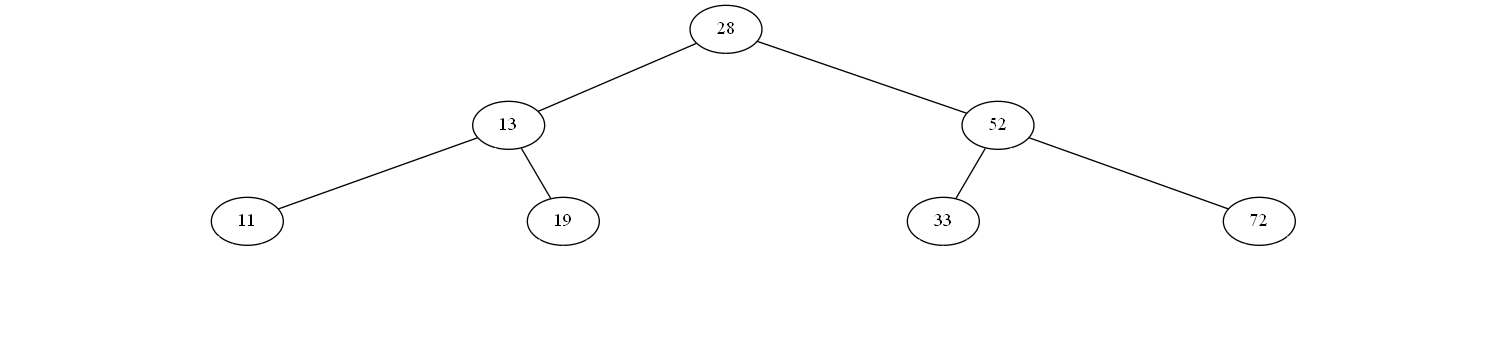

In [1]:
# Python program za prikaz obilazaka binarnog stabla
  
# Python razred koja predstavlja pojedinačni čvor binarnog stabla
# kljuc - podatak ili vrijednost čvora
class Cvor: 
    def __init__(self, kljuc): 
        self.lijevo = None
        self.desno = None
        self.podatak = kljuc 

# Funkcija za in-order obilazak
def ispisInorder(korijen): 
  
    if korijen: 
        # rekurzivni odlazak na lijevo podstablo
        ispisInorder(korijen.lijevo) 
  
        # ispis čvora/korijena/roditelja
        print(korijen.podatak) 
  
        # rekurzivni odlazak na desno desno podstablo
        ispisInorder(korijen.desno) 

# Funkcija za post-order obilazak
def ispisPostorder(korijen): 
  
    if korijen: 
        # rekurzivno na lijevo podstablo
        ispisPostorder(korijen.lijevo) 
  
        # rekurzivno na desno podstablo
        ispisPostorder(korijen.desno) 
  
        #  printamo roditelja
        print(korijen.podatak) 

# Funkcija za pre-order obilazak
def ispisPreorder(korijen): 
  
    if korijen: 
        # ispis korijena/roditelja
        print(korijen.podatak) 
  
        # rekurzivni poziv lijevog podstabla
        ispisPreorder(korijen.lijevo) 
  
        # rekurzivni poziv na desnog podstabla
        ispisPreorder(korijen.desno) 
      
    
# Kôd za pokretanje
if __name__ == "__main__":
    korijen = Cvor(28) 
    korijen.lijevo = Cvor(13) 
    korijen.desno = Cvor(52) 
    
    korijen.lijevo.lijevo = Cvor(11) 
    korijen.lijevo.desno = Cvor(19) 
    korijen.desno.lijevo = Cvor(33) 
    korijen.desno.desno = Cvor(72) 
    
          
    print ("Pre-order obilazak binarnog stabla:")
    ispisPreorder(korijen)
  
    print ("\nIn-order obilazak binarnog stabla:")
    ispisInorder(korijen)
  
    print ("\nPost-order obilazak binarnog stabla:")
    ispisPostorder(korijen)

Pre-order obilazak binarnog stabla:
28
13
11
19
52
33
72

In-order obilazak binarnog stabla:
11
13
19
28
33
52
72

Post-order obilazak binarnog stabla:
11
19
13
33
72
52
28


### Primjer 2 - Pretvorba binarnog stabla u binarno stablo pretraživanja (BST)

Potrebno je pretvoriti zadano binarno stablo u binarno stablo pretraživanja. 

Primjer 1

Ulaz - binarno stablo:
       
          10
         /  \
        2    7
       / \
      8   4
       
Izlaz - binarno stablo pretraživanja:

          8
         /  \
        4    10
       / \
      2   7
       
    


Primjer 2

Ulaz - binarno stablo:
       
          10
         /  \
        30   15
       /      \
      20       5
       
       
Izlaz - binarno stablo pretraživanja:

          15
         /  \
       10    20
       /      \
      5        30
        

**Postupak rješavanja:**


1. Inorder obilazak stabla i pohranjivanje tog redoslijeda u pomoćno polje *polje[]*. 
2. Sortiranje pomoćnog polja *polje[]* (ugrađenom Python funkcijom *sort*). 
3. Ponovni inorder obilazak i kopiranje elemenata polja u čvorove stabla po redu kako su pohranjeni u polju *polje[]*.


In [2]:
# Program za pretvorbu binarnog stabla u binarno stablo pretraživanja

# Čvor binarnog stabla 
class Cvor: 
      
    # Konstruktor 
    def __init__(self, podatak): 
        self.podatak  = podatak  
        self.lijevo = None
        self.desno = None
          
# Pomoćna funkcija za pohranu inorder obilaska stabla 
def pohraniInorder(korijen, inorder): 
      
    # Osnovni slučaj
    if korijen is None: 
        return 
      
    # Pohrana lijevog podstabla 
    pohraniInorder(korijen.lijevo, inorder) 
      
    # Spremanje podatka u korijenu 
    inorder.append(korijen.podatak) 
  
    # Pohrana desnog podstabla 
    pohraniInorder(korijen.desno, inorder) 

# Pomoćna funkcija za kopiranje sadržaja sortiranog polja u binarno stablo pretraživanja
def poljeUBinarnoStablo(polje, korijen): 
  
    # Osnovni slučaj 
    if korijen is None: 
        return 
      
    # Prijenos podataka u lijevo podstablo 
    poljeUBinarnoStablo(polje, korijen.lijevo) 
  
    # Upis podatka u trenutni korijen 
    korijen.podatak = polje[0] 
    polje.pop(0) 
  
    # Prijenos podataka u desno podstablo 
    poljeUBinarnoStablo(polje, korijen.desno) 

# Funkcija za pretvorbu binarnog stabla u binarno stablo pretraživanja
def binarnoStabloUBST(korijen): 
      
    # Osnovni slučaj  
    if korijen is None: 
        return 
  
    # Pohrana u privremeno polje  
    polje = [] 
    pohraniInorder(korijen, polje) 
      
    # Sortiranje polja 
    polje.sort() 
  
    # Vraćanje podataka u stablo 
    poljeUBinarnoStablo(polje, korijen) 

# Inorder ispis
def ispisInorder(korijen): 
    if korijen is None: 
        return
    ispisInorder(korijen.lijevo) 
    print (korijen.podatak)  
    ispisInorder(korijen.desno)          
        
# Program za ispitivanje funkcionalnosti
if __name__ == "__main__":
    
    """
    Ulaz - binarno stablo:
       
          10
         /  \        a)
        2    7
       / \
      8   4
       
    Izlaz - binarno stablo pretraživanja:

          8
         /  \
        4    10      b)
       / \
      2   7
    
    
     
    """
    # zadavanje binarnog stabla (primjer 1) prema slici a) - nakon pretvorbe u BST dobije se stablo prema slici b)
    print ("** Primjer 1 **")
    korijen = Cvor(10) 
    korijen.lijevo = Cvor(2) 
    korijen.desno = Cvor(7) 
    korijen.lijevo.lijevo = Cvor(8) 
    korijen.lijevo.desno= Cvor(4) 

    print("Inorder ispis binarnog stabla")
    ispisInorder(korijen) 
    
    
    print("Poziv funkcije za pretvorbu:") 
    # Pretvorba binarnog stabla u binarno stablo pretraživanja
    binarnoStabloUBST(korijen) 
  
    print ("Inorder obilazak dobivenog binarnog stabla pretraživanja")
    print ("Inorder obilazak stabla je sada sortirani niz")
    ispisInorder(korijen) 
    
    # zadavanje binarnog stabla (primjer 2) prema slici a) - nakon pretvorbe u BST dobije se stablo prema slici b)
    print ("** Primjer 2 **")
    korijen = Cvor(10) 
    korijen.lijevo = Cvor(30) 
    korijen.desno = Cvor(15) 
    korijen.lijevo.lijevo = Cvor(20) 
    korijen.desno.desno= Cvor(5) 

    print("Inorder ispis binarnog stabla")
    ispisInorder(korijen) 
    
    
    print("Poziv funkcije za pretvorbu:") 
    # Pretvorba binarnog stabla u binarno stablo pretraživanja
    binarnoStabloUBST(korijen) 
  
    print ("Inorder obilazak dobivenog binarnog stabla pretraživanja")
    print ("Inorder obilazak stabla je sada sortirani niz")
    ispisInorder(korijen)

** Primjer 1 **
Inorder ispis binarnog stabla
8
2
4
10
7
Poziv funkcije za pretvorbu:
Inorder obilazak dobivenog binarnog stabla pretraživanja
Inorder obilazak stabla je sada sortirani niz
2
4
7
8
10
** Primjer 2 **
Inorder ispis binarnog stabla
20
30
10
15
5
Poziv funkcije za pretvorbu:
Inorder obilazak dobivenog binarnog stabla pretraživanja
Inorder obilazak stabla je sada sortirani niz
5
10
15
20
30


1. ZADATAK: Implementirati u prethodnom programu globalnu funkciju koja će vam ispisati sve listove stabla (rekurzivno) i ugraditi brojač (globalna varijabla) koji broji koliko ukupno ima listova. Globalna varijabla se postavlja izvan bilo koje funkcije npr. *brojac = 0*, a u nekoj funkciji deklarira se sa: *global brojac*.

In [3]:
brojac = 0
def ispisListova(korijen):
    global brojac

    if korijen.lijevo == None and korijen.desno == None and korijen.podatak != None:
        brojac += 1
        print(korijen.podatak)
        return
    
    ispisListova(korijen.lijevo)
    ispisListova(korijen.desno)

if __name__ == "__main__":
    # zadavanje binarnog stabla (primjer 1) prema slici a) - nakon pretvorbe u BST dobije se stablo prema slici b)
    korijen = Cvor(10) 
    korijen.lijevo = Cvor(2) 
    korijen.desno = Cvor(7) 
    korijen.lijevo.lijevo = Cvor(8) 
    korijen.lijevo.desno= Cvor(4) 

    # Provjera rješenja zadanih zadataka
    print("Zadatak 1:")
    print("Ispis listova")
    ispisListova(korijen)
    print("Broj listova:", brojac)

Zadatak 1:
Ispis listova
8
4
7
Broj listova: 3


2. ZADATAK: Implementirati (rekurzivno) u prethodnom programu globalne funkcije za preorder  (korijen -> lijevo dijete -> desno dijete) i postorder (lijevo dijete -> desno dijete -> korijen) obilaske stabla. 
                

In [4]:
def preorderObilazak(korijen):
    if korijen == None:
        return
    print(korijen.podatak)
    preorderObilazak(korijen.lijevo)
    preorderObilazak(korijen.desno)

def postorderObilazak(korijen):
    if korijen == None:
        return
    preorderObilazak(korijen.lijevo)
    preorderObilazak(korijen.desno)
    print(korijen.podatak)

# Program za ispitivanje funkcionalnosti
if __name__ == "__main__":
    # zadavanje binarnog stabla (primjer 1) prema slici a) - nakon pretvorbe u BST dobije se stablo prema slici b)
    korijen = Cvor(10) 
    korijen.lijevo = Cvor(2) 
    korijen.desno = Cvor(7) 
    korijen.lijevo.lijevo = Cvor(8) 
    korijen.lijevo.desno= Cvor(4) 

    # Provjera rješenja zadanih zadataka
    print("Zadatak 2:")
    print("Preorder ispis binarnog stabla")
    preorderObilazak(korijen) 
    
    print("\nPostorder ispis binarnog stabla")
    postorderObilazak(korijen) 

Zadatak 2:
Preorder ispis binarnog stabla
10
2
8
4
7

Postorder ispis binarnog stabla
2
8
4
7
10


3. ZADATAK: Implementirati globalne funkcije za traženje najmanje i najveće vrijednosti u stablu (rekurzivno) nakon što je napravljena pretvorba običnog binarnog stabla u binarno stablo pretraživanja.
    

In [5]:
def najmanjaVrijednost(korijen):
    if korijen.lijevo == None:
        return korijen.podatak
    return najmanjaVrijednost(korijen.lijevo)
    
        
def najvecaVrijednost(korijen):
    if korijen.desno == None:
        return korijen.podatak
    return najmanjaVrijednost(korijen.desno)

# Program za ispitivanje funkcionalnosti
if __name__ == "__main__":
    # zadavanje binarnog stabla (primjer 1) prema slici a) - nakon pretvorbe u BST dobije se stablo prema slici b)
    korijen = Cvor(10) 
    korijen.lijevo = Cvor(2) 
    korijen.desno = Cvor(7) 
    korijen.lijevo.lijevo = Cvor(8) 
    korijen.lijevo.desno= Cvor(4) 

    binarnoStabloUBST(korijen)
    najmanja = najmanjaVrijednost(korijen)
    print(f'Najmanja: {najmanja}')
    najveca = najvecaVrijednost(korijen)
    print(f'Najveca: {najveca}')

Najmanja: 2
Najveca: 10


4. ZADATAK: Implementirati globalnu funkciju (rekurzivno) za određivanje visine stabla. Uputa: rekurzivno se računa visina kao 1 + *max*(visina lijevog podstabla, visina desnog podstabla) na svakoj razini. Osnovni slučaj je ako je korijen jednak null (None), tj. stablo je prazno, i tada je visina 0.


In [6]:
def dohvati_visinu(korijen):
    if korijen == None:
        return 0
    else:
        lijevo_vis = dohvati_visinu(korijen.lijevo)
        desno_vis = dohvati_visinu(korijen.desno)
        return 1 + max(lijevo_vis, desno_vis)

# Program za ispitivanje funkcionalnosti
if __name__ == "__main__":
    # zadavanje binarnog stabla (primjer 1) prema slici a) - nakon pretvorbe u BST dobije se stablo prema slici b)
    korijen = Cvor(10) 
    korijen.lijevo = Cvor(2) 
    korijen.desno = Cvor(7) 
    korijen.lijevo.lijevo = Cvor(8) 
    korijen.lijevo.desno= Cvor(4) 

    print("\nZadatak 4:")
    print("visina")
    print(dohvati_visinu(korijen))


Zadatak 4:
visina
3


5. ZADATAK: Implementirati funkciju za obilazak po širini (ispis po razinama s lijeva na desno). Npr. za stablo na slici a) u prethodnom kodu tj obilazak treba dati 10, 2, 7, 8, 4, a za sliku b) treba se dobiti ispis 8, 4, 10, 2, 7. Moguća su dva načina: rekurzivni (treba znati visinu stabla) i iterativni uz pomoć reda (*queue*). Riješiti oba primjera i ispitati na zadanim stablima.

In [7]:
"""
    Ulaz - binarno stablo:
       
          10
         /  \        a)
        2    7
       / \
      8   4
       
    Izlaz - binarno stablo pretraživanja:

          8
         /  \
        4    10      b)
       / \
      2   7
    
    
     
"""

def ispisPoRazinamaRekurzivno(korijen):
    h =dohvati_visinu(korijen)
    for i in range(1, h+1):
        ispisRazine(korijen, i)

def ispisRazine(korijen: Cvor, razina):
    
    if korijen == None:
        return
    
    if razina == 1:
        print(korijen.podatak)

    elif razina > 1:
        ispisRazine(korijen.lijevo, razina-1)
        ispisRazine(korijen.desno, razina-1)


def ispisPoRazinamaIterativno(korijen: Cvor):
    
    if korijen == None:
        return
    
    red = []

    red.append(korijen)

    while len(red) > 0:

        print(red[0].podatak)
        
        cvor = red.pop(0)

        if cvor.lijevo != None:
            red.append(cvor.lijevo)

        if cvor.desno != None:
            red.append(cvor.desno)

if __name__ == "__main__":
    # zadavanje binarnog stabla (primjer 1) prema slici a) - nakon pretvorbe u BST dobije se stablo prema slici b)
    korijen = Cvor(10) 
    korijen.lijevo = Cvor(2) 
    korijen.desno = Cvor(7) 
    korijen.lijevo.lijevo = Cvor(8) 
    korijen.lijevo.desno= Cvor(4) 

    print("\nZadatak 5:")
    print ("Ispis obilaska stabla po razinama (rekurzivno)")
    ispisPoRazinamaRekurzivno(korijen) 
  
    print ("Ispis obilaska stabla po razinama (iterativno)")
    ispisPoRazinamaIterativno(korijen) 


Zadatak 5:
Ispis obilaska stabla po razinama (rekurzivno)
10
2
7
8
4
Ispis obilaska stabla po razinama (iterativno)
10
2
7
8
4
